<font color='orange'>**Please create your own copy before starting modification**</font>

Dependencies: Add Your dependencies here

In [525]:
import pandas as pd
import numpy as np
from google.colab import drive

In [526]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [527]:
file_path = '/content/drive/My Drive/Data_Decision_Trees - Sheet1.csv' 

Code

<font color='red'>**Part 1**</font>

<font color='cyan'>**Dataset: The dataset represents the mood of a student to go to class depending on the weather at IIT Jodhpur. We have been accustomed to online classes so this is to give you folks a feeling of attending classes in the post COVID scenario.**</font>

A sample of the dataset is shown

In [528]:
dic = {'Time':'Morning','Temperature':'Hot','Friend_Attending':'No','Windy':'Yes','Attend':'Yes'}
df= pd.DataFrame(dic,index=[0])
df

,Time,Temperature,Friend_Attending,Windy,Attend
0,Morning,Hot,No,Yes,Yes


Read the complete data from the CSV file at link: "Add Link to CSV here"



In [529]:
df = pd.read_csv(file_path)
df.head()
print(df)

         Time Temperature Friend_Attending Windy Attend
0     Morning         Hot              Yes   Low     No
1     Morning         Hot              Yes  High     No
2   Afternoon         Hot              Yes   Low    Yes
3     Evening        Warm              Yes   Low    Yes
4     Evening        Cool               No   Low    Yes
5     Evening        Cool               No  High     No
6   Afternoon        Cool               No  High    Yes
7     Morning        Warm              Yes   Low     No
8     Morning        Cool               No   Low    Yes
9     Evening        Warm               No   Low    Yes
10    Morning        Warm               No  High    Yes
11  Afternoon        Warm              Yes  High    Yes
12  Afternoon         Hot               No   Low    Yes
13    Evening        Warm              Yes  High     No


<font color='red'>**Part 2**</font>

Implement the same using Scikit Learn

Preprocessing

In [530]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df['Time'] = Le.fit_transform(df['Time'])
df['Temperature'] = Le.fit_transform(df['Temperature'])
df['Friend_Attending'] = Le.fit_transform(df['Friend_Attending'])
df['Windy'] = Le.fit_transform(df['Windy'])
df['Attend'] = Le.fit_transform(df['Attend'])
print(df)

    Time  Temperature  Friend_Attending  Windy  Attend
0      2            1                 1      1       0
1      2            1                 1      0       0
2      0            1                 1      1       1
3      1            2                 1      1       1
4      1            0                 0      1       1
5      1            0                 0      0       0
6      0            0                 0      0       1
7      2            2                 1      1       0
8      2            0                 0      1       1
9      1            2                 0      1       1
10     2            2                 0      0       1
11     0            2                 1      0       1
12     0            1                 0      1       1
13     1            2                 1      0       0


Shuffle the data frame

In [531]:
df.sample(frac=1)

,Time,Temperature,Friend_Attending,Windy,Attend
12,0,1,0,1,1
6,0,0,0,0,1
3,1,2,1,1,1
0,2,1,1,1,0
4,1,0,0,1,1
2,0,1,1,1,1
10,2,2,0,0,1
11,0,2,1,0,1
13,1,2,1,0,0
1,2,1,1,0,0


Take two for testing and rest for training

In [532]:
from sklearn.model_selection import train_test_split
Y = df['Attend']
X = df.drop(['Attend'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.1,random_state=25)
# print(X)
# print(Y)
# print(X_train)
# print(Y_train)
# print(X_test)
# print(Y_test)

Display Training

In [533]:
print("X_train")
print(X_train)
print("\nY_train")
print(Y_train)

X_train
    Time  Temperature  Friend_Attending  Windy
3      1            2                 1      1
5      1            0                 0      0
11     0            2                 1      0
1      2            1                 1      0
12     0            1                 0      1
13     1            2                 1      0
8      2            0                 0      1
2      0            1                 1      1
7      2            2                 1      1
6      0            0                 0      0
10     2            2                 0      0
4      1            0                 0      1

Y_train
3     1
5     0
11    1
1     0
12    1
13    0
8     1
2     1
7     0
6     1
10    1
4     1
Name: Attend, dtype: int64


Display Testing

In [534]:
print("X_test")
print(X_test)
print("\nY_test")
print(Y_test)

X_test
   Time  Temperature  Friend_Attending  Windy
0     2            1                 1      1
9     1            2                 0      1

Y_test
0    0
9    1
Name: Attend, dtype: int64


Given the follwing data construct a decision tree using Entropy

[Text(133.92000000000002, 195.696, 'X[0] <= 0.5\nentropy = 0.918\nsamples = 12\nvalue = [4, 8]'),
 Text(100.44000000000001, 152.208, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(167.40000000000003, 152.208, 'X[2] <= 0.5\nentropy = 1.0\nsamples = 8\nvalue = [4, 4]'),
 Text(100.44000000000001, 108.72, 'X[0] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(66.96000000000001, 65.232, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(33.480000000000004, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(100.44000000000001, 21.744, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(133.92000000000002, 65.232, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(234.36, 108.72, 'X[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [3, 1]'),
 Text(200.88000000000002, 65.232, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(267.84000000000003, 65.232, 'X[0] <= 1.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(234.36, 21.744, 'entropy = 0

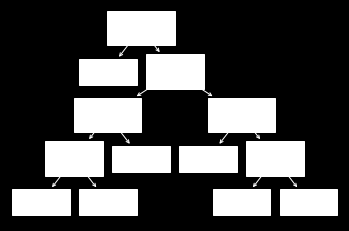

In [535]:
from sklearn import tree
clf1 = tree.DecisionTreeClassifier(criterion = 'entropy')
clf1 = clf1.fit(X_train, Y_train)
tree.plot_tree(clf1)

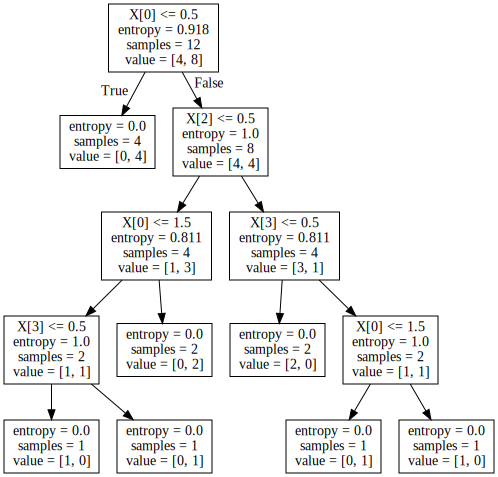

In [536]:
import graphviz 
dot_data = tree.export_graphviz(clf1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [537]:
X_pred = clf1.predict(X_test)
X_pred == Y_test

0    True
9    True
Name: Attend, dtype: bool

Fit the classifier using Gini Impurity

[Text(111.60000000000001, 195.696, 'X[0] <= 0.5\ngini = 0.444\nsamples = 12\nvalue = [4, 8]'),
 Text(74.4, 152.208, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(148.8, 152.208, 'X[3] <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]'),
 Text(74.4, 108.72, 'X[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(37.2, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(111.60000000000001, 65.232, 'X[2] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(74.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(148.8, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 108.72, 'X[1] <= 1.0\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(186.0, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(260.40000000000003, 65.232, 'X[0] <= 1.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(223.20000000000002, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(297.6, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

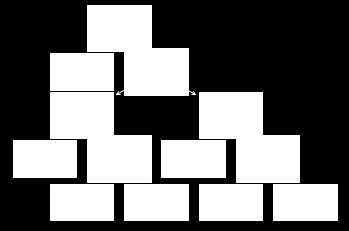

In [538]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion = 'gini')
clf = clf.fit(X_train, Y_train )
tree.plot_tree(clf)

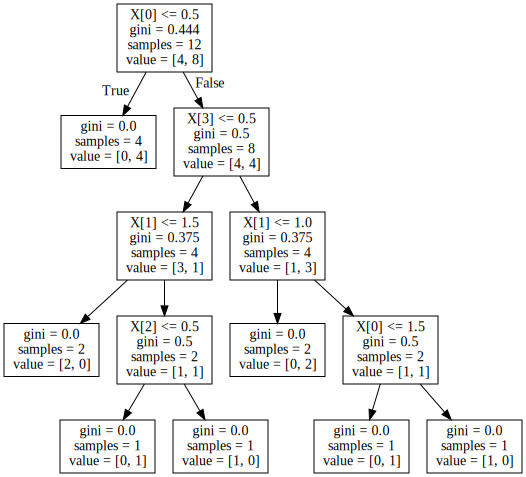

In [539]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

In [540]:
X_pred = clf.predict(X_test)
X_pred == Y_test

0    False
9     True
Name: Attend, dtype: bool

Print the cross validation score with folds = 5

In [541]:
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std
# results=[]
print("Entropy: ")
mean=0
for i in range(5):
  cv = KFold(n_splits=5)
  for train, test in cv.split(df):
    print('train: %s, test: %s' % (train, test))
  model = clf1
  scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
  print("Score: ",scores)
  mean+=scores
print()
print("Mean: ",mean/5)
# results=[]
print("\ngini impurity: ")
mean=0
for i in range(5):
  cv = KFold(n_splits=5)
  for train, test in cv.split(df):
    print('train: %s, test: %s' % (train, test))
  model = clf
  scores = cross_val_score(model, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
  print("Score: ",scores)
  mean+=scores
print()
print("Mean: ",mean/5)


Entropy: 
train: [ 3  4  5  6  7  8  9 10 11 12 13], test: [0 1 2]
train: [ 0  1  2  6  7  8  9 10 11 12 13], test: [3 4 5]
train: [ 0  1  2  3  4  5  9 10 11 12 13], test: [6 7 8]
train: [ 0  1  2  3  4  5  6  7  8 12 13], test: [ 9 10 11]
train: [ 0  1  2  3  4  5  6  7  8  9 10 11], test: [12 13]
Score:  [0.33333333 0.33333333 0.33333333 0.66666667 0.5       ]
train: [ 3  4  5  6  7  8  9 10 11 12 13], test: [0 1 2]
train: [ 0  1  2  6  7  8  9 10 11 12 13], test: [3 4 5]
train: [ 0  1  2  3  4  5  9 10 11 12 13], test: [6 7 8]
train: [ 0  1  2  3  4  5  6  7  8 12 13], test: [ 9 10 11]
train: [ 0  1  2  3  4  5  6  7  8  9 10 11], test: [12 13]
Score:  [1.         0.33333333 0.33333333 0.66666667 0.5       ]
train: [ 3  4  5  6  7  8  9 10 11 12 13], test: [0 1 2]
train: [ 0  1  2  6  7  8  9 10 11 12 13], test: [3 4 5]
train: [ 0  1  2  3  4  5  9 10 11 12 13], test: [6 7 8]
train: [ 0  1  2  3  4  5  6  7  8 12 13], test: [ 9 10 11]
train: [ 0  1  2  3  4  5  6  7  8  9 10 11], t

Print the depth of the decison Tree

In [542]:

print("Entropy: ",clf1.get_depth())
print("gini: ",clf.get_depth())

Entropy:  4
gini:  4


Print the number of leaves in the decision Tree

In [543]:
print("Entropy: ",clf1.get_n_leaves())
print("gini: ",clf.get_n_leaves())

Entropy:  7
gini:  7


Return the index of the leaf that each sample is predicted as.



In [544]:
print("Entropy: ",clf1.apply(X_train))
print("gini: ",clf.apply(X_train))

Entropy:  [11  5  1  9  1  9  7  1 12  1  7  6]
gini:  [11  4  1  4  1  7  9  1 12  1  6  9]


Print the decision path

In [545]:
print("Entropy: ")
print(clf1.decision_path(X_test).toarray())
print("gini: ")
print(clf.decision_path(X_test).toarray())

Entropy: 
[[1 0 1 0 0 0 0 0 1 0 1 0 1]
 [1 0 1 1 1 0 1 0 0 0 0 0 0]]
gini: 
[[1 0 1 0 0 0 0 0 1 1 0 0 0]
 [1 0 1 0 0 0 0 0 1 0 1 1 0]]


Print the gini impurity of each feature

In [546]:

print("For Entropy:")
print(clf1.feature_importances_)
print("For gini impurity:")
print(clf.feature_importances_)

For Entropy:
[0.56850439 0.         0.13700877 0.29448684]
For gini impurity:
[0.4375 0.1875 0.1875 0.1875]


Training Accuracy

In [547]:
print("Entropy: ",clf1.score(X_train,Y_train))
print("Gini: ",clf.score(X_train,Y_train))

Entropy:  1.0
Gini:  1.0


Testing accuracy

In [548]:
print("Entropy: ",clf1.score(X_test,Y_test))
print("Gini: ",clf.score(X_test,Y_test))

Entropy:  1.0
Gini:  0.5


Map the query: [Time: Morning, Temperature: Warm, Friend_Attending: No, 'Wind': Low] to the correct numerical value as the training and the predict the output.

In [549]:
query=pd.DataFrame([[2,2,0,1]])
print("Entropy: ",clf1.predict(query))
print("gini: ",clf.predict(query))

Entropy:  [1]
gini:  [0]


<font color='red'>**Part 3**</font>

Plot the decision tree

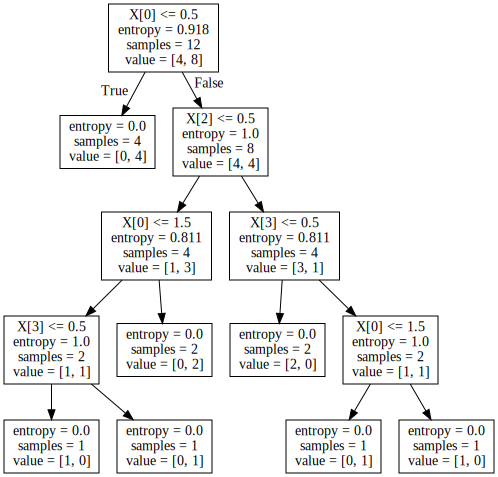

In [550]:
import graphviz 
dot_data = tree.export_graphviz(clf1, out_file=None) 
graph = graphviz.Source(dot_data) 
graph


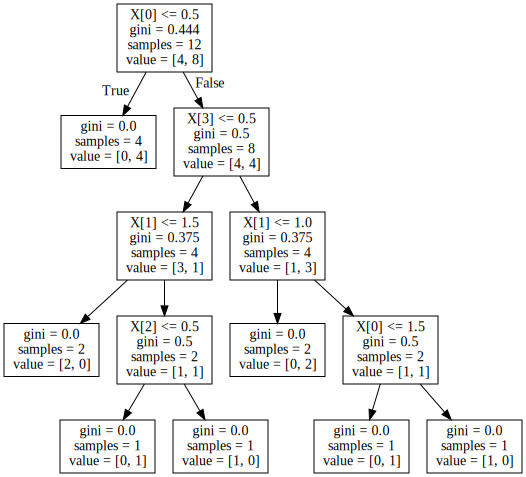

In [551]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graph = graphviz.Source(dot_data) 
graph

Plot the decision surface

['Time', 'Temperature']
(40000,)
['Time', 'Friend_Attending']
(30000,)
['Time', 'Windy']
(30000,)
['Temperature', 'Friend_Attending']
(30000,)
['Temperature', 'Windy']
(30000,)
['Friend_Attending', 'Windy']
(22500,)


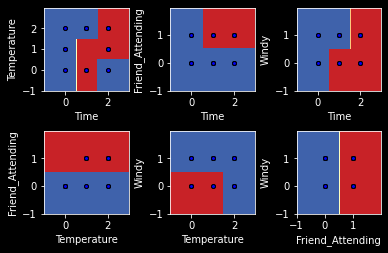

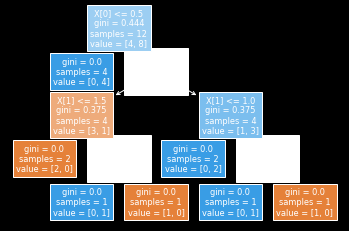

In [552]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

n_classes = 2
plot_colors = "rb"
plot_step=0.02

for pairidx, pair in enumerate([["Time", "Temperature"], ["Time", "Friend_Attending"], ["Time", "Windy"], 
                                ["Temperature", "Friend_Attending"], ["Temperature", "Windy"], ["Friend_Attending", "Windy"]]):
    # We only take the two corresponding features
    X = df[pair]
    Y = df['Attend']
    print(pair)

    # Train
    clf_new = tree.DecisionTreeClassifier().fit(X, Y)
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = df[pair[0]].min() - 1, df[pair[0]].max() + 1
    y_min, y_max = df[pair[1]].min() - 1, df[pair[1]].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)
    print(xx.ravel().shape)
    Z = clf_new.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    # plt.xlabel(iris.feature_names[pair[0]])
    # plt.ylabel(iris.feature_names[pair[1]])
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])

    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(Y == i)
        plt.scatter(df[pair[0]], df[pair[1]], c=color, label=df['Attend'],
                    cmap=plt.cm.RdYlBu, edgecolor='black', s=15)


plt.figure()
# clf= DecisionTreeClassifier().fit(X, Y)
tree.plot_tree(clf,filled=True)
plt.show()

<font color='magenta'>**Part 04: Not Compulsory**</font>

Advanced: Can you implement the partitioning of the decision tree using the following algorithm

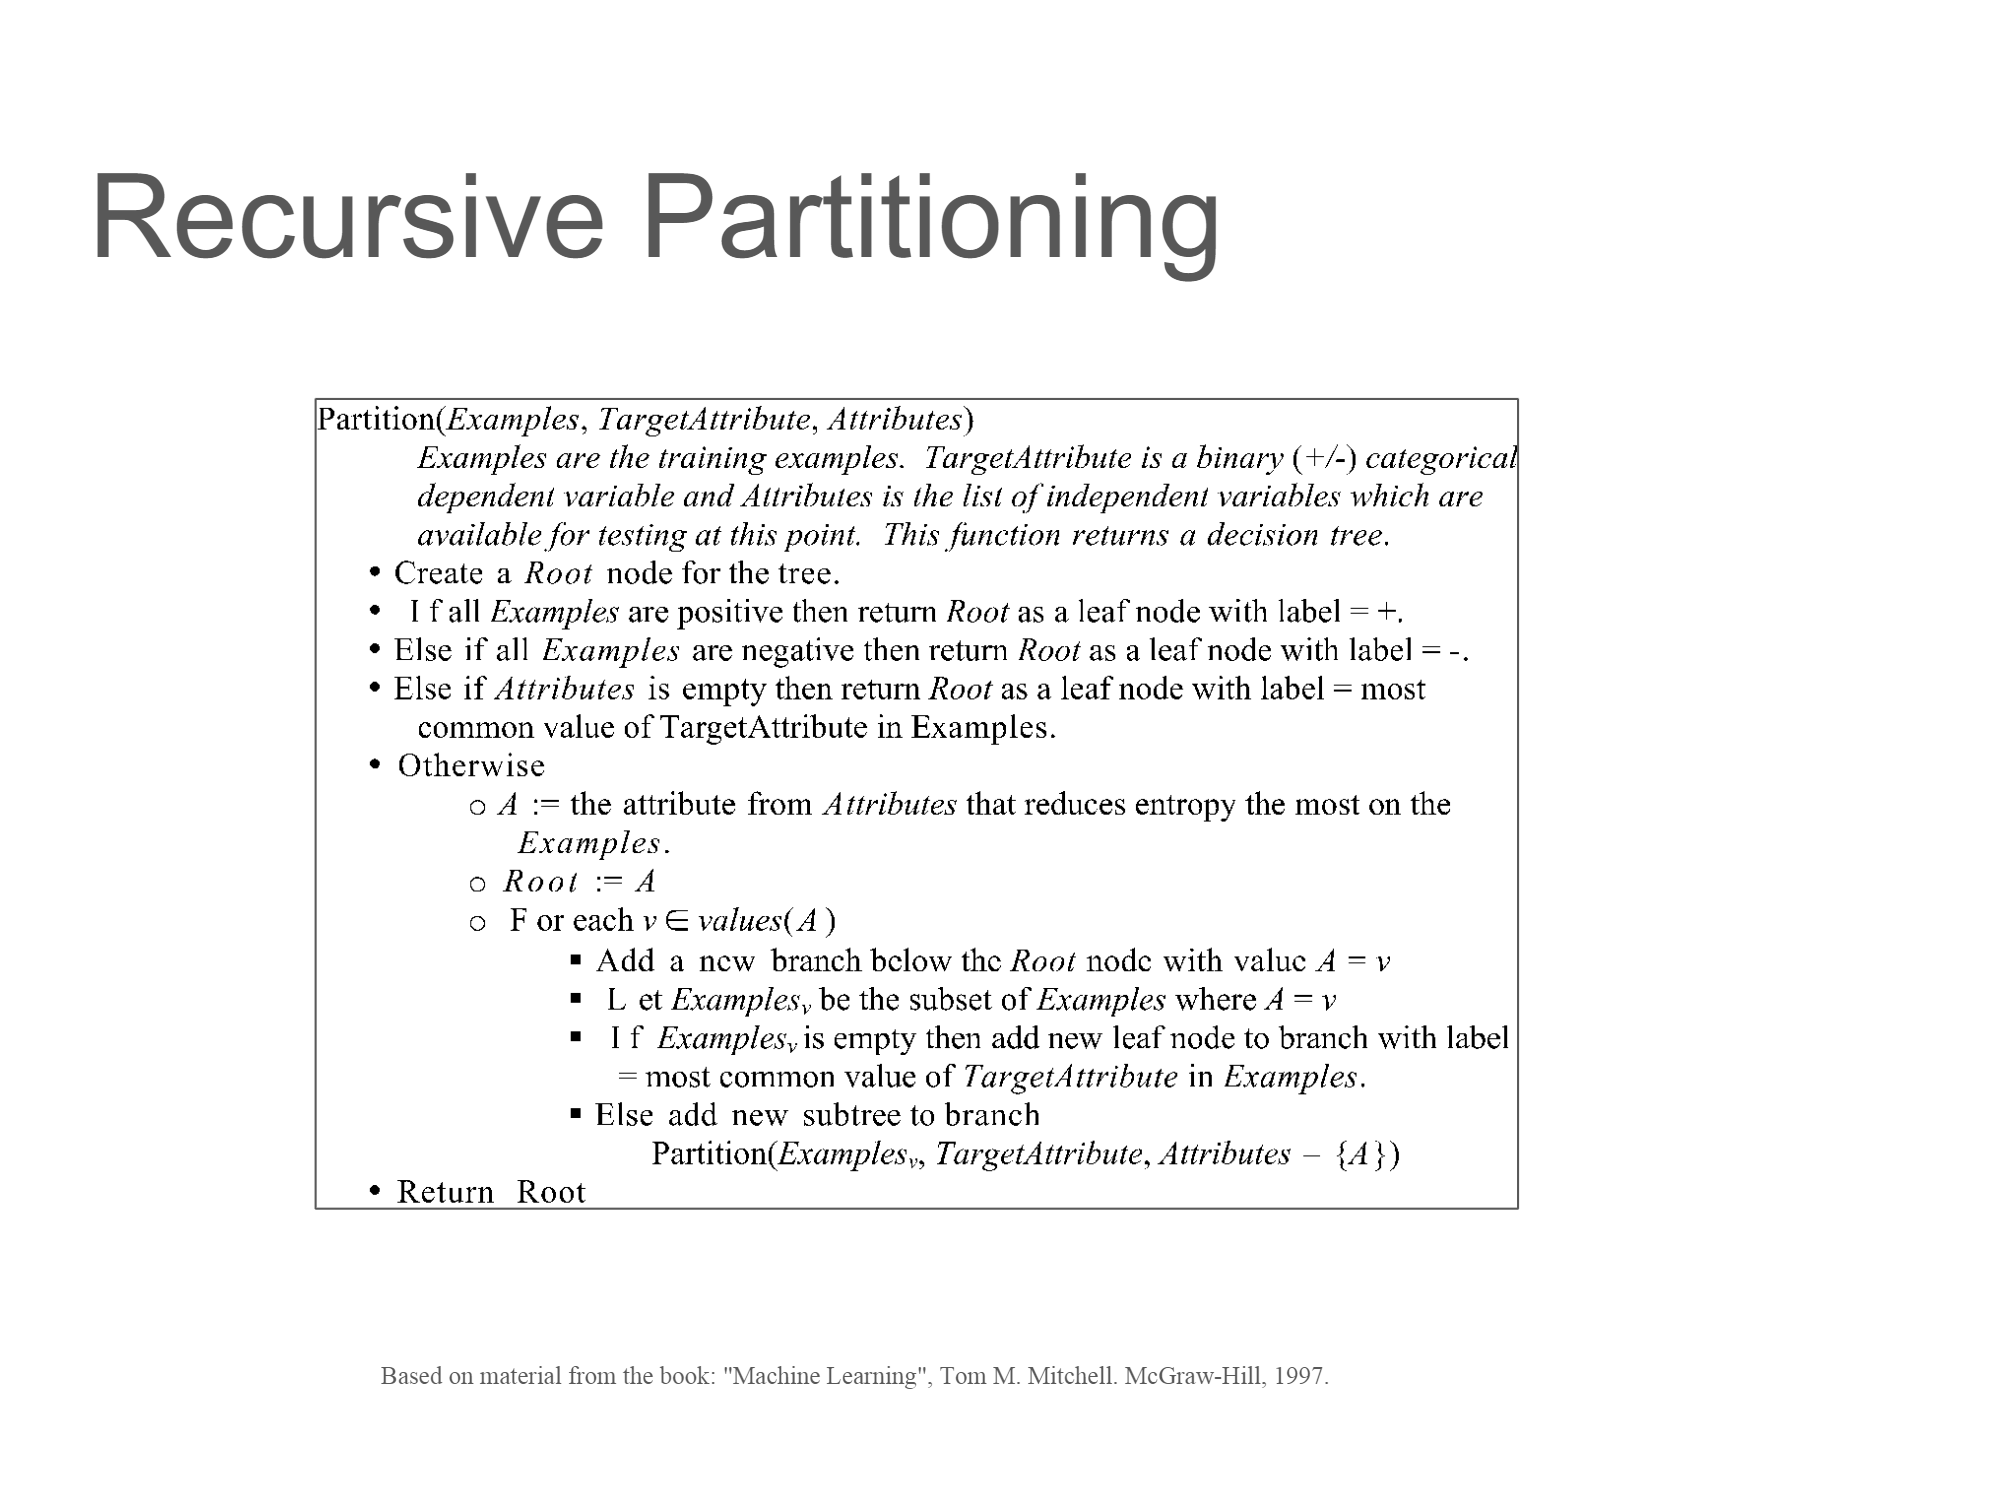

Part 5: Building Decision Trees when the data is of a continuous nature

In the previous case the nodes were broken based on entropy/gini impurity. In the case of regression the mean sqaured error is the decsion parameter for splitting the nodes. The following dataset contains continuous data and we need to use decision trees with regression.

Read the dataset

In [553]:
file_path1 = '/content/drive/My Drive/death.csv' 

In [554]:
df1 = pd.read_csv(file_path1,na_values=["**","*"])
df1['Average Deaths per Year']=df1['Average Deaths per Year'].str.replace(",","").astype(float)
df1['FIPS']=df1['FIPS'].astype(float)
df1['Age-Adjusted Death Rate']=df1['Age-Adjusted Death Rate'].astype(float)
df1['Lower 95% Confidence Interval for Death Rate']=df1['Lower 95% Confidence Interval for Death Rate'].astype(float)
df1['Upper 95% Confidence Interval for Death Rate']=df1['Upper 95% Confidence Interval for Death Rate'].astype(float)
df1['Recent 5-Year Trend (2) in Death Rates']=df1['Recent 5-Year Trend (2) in Death Rates'].astype(float)
df1['Lower 95% Confidence Interval for Trend']=df1['Lower 95% Confidence Interval for Trend'].astype(float)
print(df1.dtypes)
df1.head()
# print(df1)

County                                           object
FIPS                                            float64
Met Objective of 45.5? (1)                       object
Age-Adjusted Death Rate                         float64
Lower 95% Confidence Interval for Death Rate    float64
Upper 95% Confidence Interval for Death Rate    float64
Average Deaths per Year                         float64
Recent Trend (2)                                 object
Recent 5-Year Trend (2) in Death Rates          float64
Lower 95% Confidence Interval for Trend         float64
Upper 95% Confidence Interval for Trend         float64
dtype: object


,County,FIPS,Met Objective of 45.5? (1),Age-Adjusted Death Rate,Lower 95% Confidence Interval for Death Rate,Upper 95% Confidence Interval for Death Rate,Average Deaths per Year,Recent Trend (2),Recent 5-Year Trend (2) in Death Rates,Lower 95% Confidence Interval for Trend,Upper 95% Confidence Interval for Trend
0,United States,0.0,No,46.0,45.9,46.1,157376.0,falling,-2.4,-2.6,-2.2
1,"Perry County, Kentucky",21193.0,No,125.6,108.9,144.2,43.0,stable,-0.6,-2.7,1.6
2,"Powell County, Kentucky",21197.0,No,125.3,100.2,155.1,18.0,stable,1.7,0.0,3.4
3,"North Slope Borough, Alaska",2185.0,No,124.9,73.0,194.7,5.0,NaN,NaN,NaN,NaN
4,"Owsley County, Kentucky",21189.0,No,118.5,83.1,165.5,8.0,stable,2.2,-0.4,4.8


Preprocess the dataset to remove all the rows with empty column values

In [555]:
from sklearn.model_selection import train_test_split
df1=df1.dropna()
# print(df1)
# print(list(df1))

Convert Categorical Values to numerical

In [556]:
from sklearn.preprocessing import LabelEncoder
Le = LabelEncoder()

df1['County'] = Le.fit_transform(df1['County'])
df1['Met Objective of 45.5? (1)'] = Le.fit_transform(df1['Met Objective of 45.5? (1)'])
df1['Recent Trend (2)'] = Le.fit_transform(df1['Recent Trend (2)'])
print(df1)

      County  ...  Upper 95% Confidence Interval for Trend
0       2452  ...                                     -2.2
1       1910  ...                                      1.6
2       1992  ...                                      3.4
4       1863  ...                                      4.8
5       2436  ...                                      0.0
...      ...  ...                                      ...
2807    1456  ...                                      0.0
2808     717  ...                                     -0.3
2810    2456  ...                                     -1.8
2811    1589  ...                                     -0.7
2812     285  ...                                      1.6

[2694 rows x 11 columns]


Split the dataset into train and test(Based on split size)

In [557]:
Y = df1['Upper 95% Confidence Interval for Trend']
X = df1.drop(['Upper 95% Confidence Interval for Trend'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 0)
print("X:\n",X)
print("Y:\n",Y)
print("X_train:\n",X_train)
print("Y_train:\n",Y_train)
print("X_test:\n",X_test)
print("Y_test:\n",Y_test)

X:
       County  ...  Lower 95% Confidence Interval for Trend
0       2452  ...                                     -2.6
1       1910  ...                                     -2.7
2       1992  ...                                      0.0
4       1863  ...                                     -0.4
5       2436  ...                                     -4.3
...      ...  ...                                      ...
2807    1456  ...                                     -5.8
2808     717  ...                                     -9.3
2810    2456  ...                                     -3.9
2811    1589  ...                                     -5.7
2812     285  ...                                     -3.0

[2694 rows x 10 columns]
Y:
 0      -2.2
1       1.6
2       3.4
4       4.8
5       0.0
       ... 
2807    0.0
2808   -0.3
2810   -1.8
2811   -0.7
2812    1.6
Name: Upper 95% Confidence Interval for Trend, Length: 2694, dtype: float64
X_train:
       County  ...  Lower 95% Confidence 

Perform the decision tree regression

In [558]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor("mse",max_depth=11)
regressor.fit(X_train, Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=11,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [559]:
cvs_r = cross_val_score(regressor,X,Y, cv=5)
print(cvs_r)

[ 0.73043325 -0.12822067  0.52086365  0.71385161  0.93090785]


Predict on test dataset

In [560]:
Y_pred = regressor.predict(X_test)
df1 = pd.DataFrame({'Real Values':Y_test, 'Predicted Values':Y_pred})
df1

,Real Values,Predicted Values
358,1.4,1.380000
1319,-2.1,-1.205263
892,2.7,0.327273
1911,0.0,0.000000
364,2.4,2.475610
...,...,...
1800,-1.5,-2.083333
242,1.2,0.933333
2308,0.8,0.745455
688,4.0,3.885000


Calculate Squared Error between predicted and real values

In [561]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_pred)

0.39595999140606114

[Text(247.31698111397878, 212.91, 'X[8] <= 7.8\nmse = 11.019\nsamples = 2155\nvalue = 0.873'),
 Text(160.65681937081473, 203.85, 'X[7] <= 0.5\nmse = 4.666\nsamples = 2150\nvalue = 0.759'),
 Text(36.42217633928571, 194.79, 'X[8] <= -2.65\nmse = 0.884\nsamples = 692\nvalue = -0.964'),
 Text(5.095044642857143, 185.73, 'X[8] <= -14.55\nmse = 1.588\nsamples = 169\nvalue = -1.946'),
 Text(1.1603571428571429, 176.67, 'X[6] <= 4.5\nmse = 2.427\nsamples = 3\nvalue = -8.3'),
 Text(0.9546428571428571, 167.60999999999999, 'mse = 0.0\nsamples = 1\nvalue = -10.3'),
 Text(1.3660714285714286, 167.60999999999999, 'X[1] <= 37021.0\nmse = 0.64\nsamples = 2\nvalue = -7.3'),
 Text(1.1603571428571429, 158.55, 'mse = 0.0\nsamples = 1\nvalue = -6.5'),
 Text(1.5717857142857143, 158.55, 'mse = 0.0\nsamples = 1\nvalue = -8.1'),
 Text(9.029732142857142, 176.67, 'X[6] <= 13.5\nmse = 0.83\nsamples = 166\nvalue = -1.831'),
 Text(2.1889285714285713, 167.60999999999999, 'X[6] <= 3.5\nmse = 0.506\nsamples = 38\nvalue =

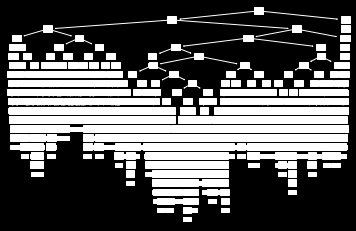

In [562]:
from sklearn import tree
clf = tree.DecisionTreeRegressor()
clf = clf.fit(X_train, Y_train)
tree.plot_tree(clf)

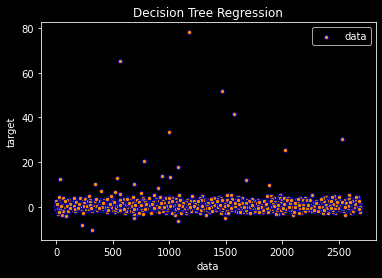

In [563]:
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
regr1 = DecisionTreeRegressor(max_depth=10)
regr1.fit(X_train, Y_train)
plt.figure()
plt.scatter(X_train.iloc[:,0], Y_train, s=20, edgecolor="darkblue",c="darkorange", label="data")
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

No handles with labels found to put in legend.


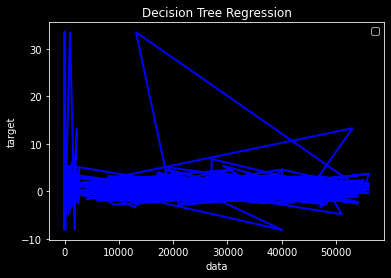

In [564]:
import matplotlib.pyplot as plt
X_test_pred = regr1.predict(X_test)
plt.figure()
plt.plot(X_test, X_test_pred, color="blue",label="", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

In [565]:
print(clf.feature_importances_)

[5.35578821e-03 9.07322960e-04 1.41047669e-05 5.52434842e-03
 7.92491689e-04 6.89132637e-02 1.39370018e-02 1.27696037e-01
 7.33803722e-01 4.30559196e-02]




<font color='green'>**References**</font>



*   [Ref1](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

*   [Ref2](https://pbpython.com/categorical-encoding.html)


*   [Ref3](https://mljar.com/blog/visualize-decision-tree/)


*   [Ref4](https://scikit-learn.org/stable/auto_examples/tree/plot_iris_dtc.html#sphx-glr-auto-examples-tree-plot-iris-dtc-py)


*   [Ref5](https://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html)

*   [Ref6](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)